Question: "What can one do to improve their chance of successfully completing their Kickstarter campaign?"
I will be looking into potential actionable insights that can assist users in designing productive campaigns.

Hypothesis: Out of our variables I believe 'country', 'launched', and 'main_category' will have the most predictive power.  While 'country' is unlikely going to be an option for an individual to manipulate, the other two variables have potential to be altered.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
df = pd.read_csv('ks-projects-201801.csv', encoding = "ISO-8859-1", low_memory=False)

In [3]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

There is very little missing data in most categories.  The only one of concern looks to be usd_pledged.  We need to see the percentage of cases 3797 is in compared to the whole.

In [8]:
#Let's see the percentage of null information for each variable.

(df.isnull().sum())/(378661)

ID                  0.000000
name                0.000011
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         0.010027
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64

As seen above, the percentage of null values is negligible.  Therefore, it is safe to drop those rows.

In [9]:
df_clean = df.dropna()

In [10]:
#Let's check to make sure the data is now free of null values.
df_clean.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


Looking at the two analyses above, the dropping of the rows was successful.  

Below we will find out how many unique categories there are for Kickstarter campaigns.  

In [12]:
df_clean.category.unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

With that list in mind, below is the list of main_categories which act an umbrella for the above list.

In [13]:
df_clean.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

The main_category list would be better suited for this project for its simplicity.  However, future projects can narrow the scope of targetted assistance by diving into a main category and then finding the best performers within.

In [14]:
#Let's find out where there has been a lot of projects. This might mean oversaturation or likely to be successful.
#We will need to compare these values with 'state' to see which projects are supported through to it's goal.
((df_clean['main_category'].value_counts())/(374860))

Film & Video    0.167252
Music           0.132129
Publishing      0.105050
Games           0.093968
Technology      0.086864
Design          0.080206
Art             0.075100
Food            0.065622
Fashion         0.060855
Theater         0.029110
Comics          0.028861
Photography     0.028752
Crafts          0.023499
Journalism      0.012682
Dance           0.010049
Name: main_category, dtype: float64

There has been a lot of activity within Film & Video dominating the largest percentage (16.7%) of campaigns.  However, more doesn't mean more profitable and with so many there might be film and video fatigue with donors.

Below is a look at how each variable is correlating with each other either positively or negatively.  Keep in mind that correlation DOES NOT mean causation.

In [15]:
df_clean.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001692,0.000478,0.000673,-0.000633,-0.000016,0.001868
goal,0.001692,1.000000,0.007327,0.003969,0.005534,0.005072,0.942691
pledged,0.000478,0.007327,1.000000,0.717858,0.857370,0.952736,0.004992
backers,0.000673,0.003969,0.717858,1.000000,0.697426,0.753449,0.004476
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000016,0.005072,0.952736,0.753449,0.907743,1.000000,0.005566
usd_goal_real,0.001868,0.942691,0.004992,0.004476,0.006172,0.005566,1.000000


Let's look at this information within a heatmap to help visualize.

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'correlation matrix (df_clean)')

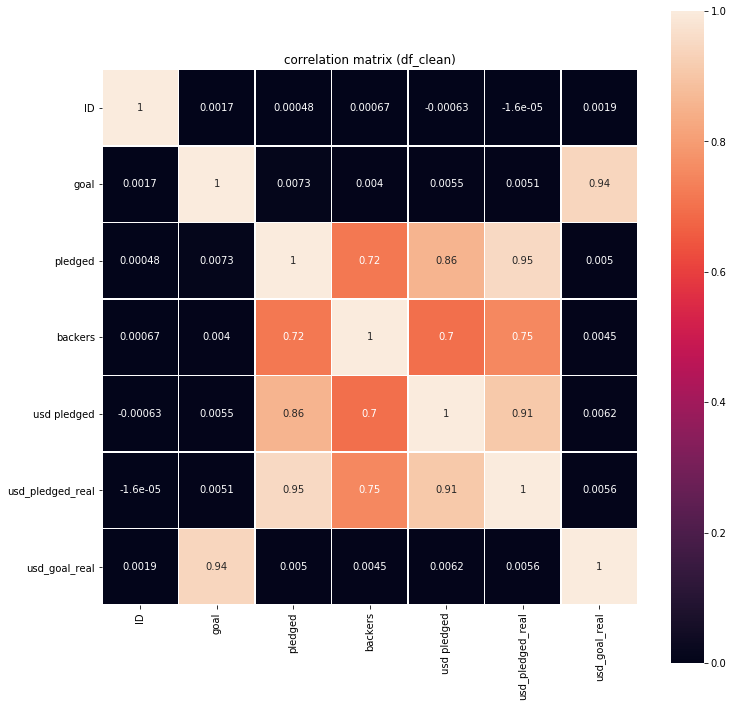

In [16]:
plt.figure(figsize=(12,12))
corrmat = df_clean.corr()

# draw the heatmap using seaborn.
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (df_clean)")



plt.show()


In [17]:
#drop one of the two highly correlated variables(usd_goal_real = keep  ,   goal = drop  ;   
#   usd_pledged_real = keep   ,   pledged = drop)
df_clean = df_clean.drop('goal', axis = 1)


In [18]:
df_clean = df_clean.drop('pledged', axis = 1)

In [19]:
#check to see if the columns dropped correctly
df_clean.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,8/11/2015 12:12,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,9/2/2017 4:43,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,1/12/2013 0:20,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,3/17/2012 3:24,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,7/4/2015 8:35,canceled,14,US,1283.0,1283.0,19500.00


We need to convert the variable 'state' into something we can use statistically.  Therefore, each possible answer choice will be made into its own variable column with a 1 = True and a 0 = False.

In [20]:
dummy = pd.get_dummies(df_clean['state'])
df_clean = df_clean.merge(dummy, left_index=True, right_index=True)

In [21]:
df_clean.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,canceled,failed,live,successful,suspended
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,8/11/2015 12:12,failed,0,GB,0.0,0.0,1533.95,0,1,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,9/2/2017 4:43,failed,15,US,100.0,2421.0,30000.00,0,1,0,0,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,1/12/2013 0:20,failed,3,US,220.0,220.0,45000.00,0,1,0,0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,3/17/2012 3:24,failed,1,US,1.0,1.0,5000.00,0,1,0,0,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,7/4/2015 8:35,canceled,14,US,1283.0,1283.0,19500.00,1,0,0,0,0


Below we visualize each of the main categories with the ratio of successful campaigns within that category.

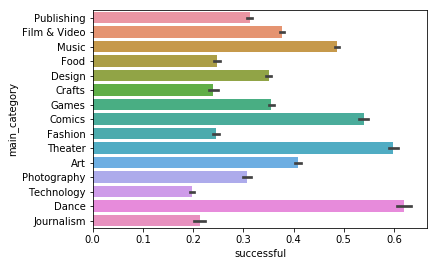

In [22]:
sns.barplot(y=df_clean['main_category'], x = df_clean['successful'])

The above graph does great in comparing each category to itself, but it is not useful in terms of quantity of total Kickstarter campaigns.  Below is the visualization of each category to it's overall importance within the site.

Successful = 1

Unsuccesful/not yet successful = 0

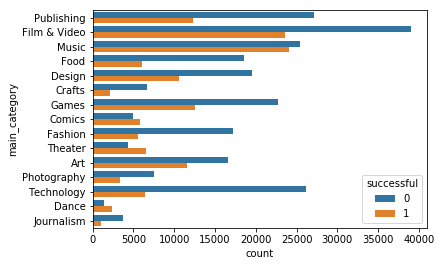

In [23]:
sns.countplot(hue=df_clean['successful'], y=df_clean['main_category'])

Let's only focus on the successful campaigns to derive our predictions within this study.

In [24]:
OnlySuccessful = df_clean[(df_clean['successful'] ==1)]
OnlySuccessful.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,canceled,failed,live,successful,suspended
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,2/26/2016 13:38,successful,224,US,52375.00,52375.00,50000.00,0,0,0,1,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,12/21/2014,12/1/2014 18:30,successful,16,US,1205.00,1205.00,1000.00,0,0,0,1,0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,4/8/2013,3/9/2013 6:42,successful,100,US,12700.00,12700.00,12500.00,0,0,0,1,0
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5/3/2017,4/5/2017 19:44,successful,761,GB,57763.78,121857.33,6469.73,0,0,0,1,0
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,8/17/2012,8/2/2012 14:11,successful,7,US,250.00,250.00,250.00,0,0,0,1,0


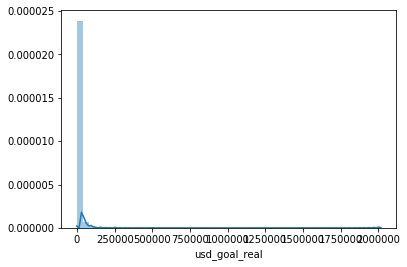

In [25]:
sns.distplot(OnlySuccessful['usd_goal_real'])

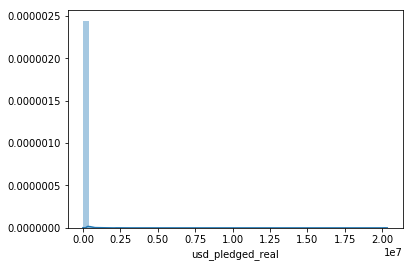

In [26]:
sns.distplot(OnlySuccessful['usd_pledged_real'])

According to the above two graphs we have some serious issues with outliers skewing the results and limiting what we can learn from it.

In [27]:
OnlySuccessful.groupby(OnlySuccessful['main_category'])['usd_pledged_real'].sum()

main_category
Art             8.024651e+07
Comics          6.651503e+07
Crafts          1.190681e+07
Dance           1.214361e+07
Design          6.631459e+08
Fashion         1.134627e+08
Film & Video    3.295488e+08
Food            1.055710e+08
Games           6.788356e+08
Journalism      1.046909e+07
Music           1.771462e+08
Photography     3.341914e+07
Publishing      1.160740e+08
Technology      5.961512e+08
Theater         3.902846e+07
Name: usd_pledged_real, dtype: float64

The above breaks down how much pledged money per main category was given with successful campaigns.

Below is the interquartile range to help identify the normal distribution despite the outliers.

In [28]:
q75, q25 = np.percentile(OnlySuccessful["usd_goal_real"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df_clean["usd_goal_real"] > max_val)
                      | (df_clean["usd_goal_real"] < min_val))[0]))
    ))


The score threshold is: 1.0
Number of outliers is: 87066
The score threshold is: 1.5
Number of outliers is: 71435
The score threshold is: 2.0
Number of outliers is: 59279
The score threshold is: 2.5
Number of outliers is: 50505
The score threshold is: 3.0
Number of outliers is: 45152
The score threshold is: 3.5
Number of outliers is: 40440
The score threshold is: 4.0
Number of outliers is: 39041
The score threshold is: 4.5
Number of outliers is: 36431


Even with the above potential normalization boundaries, we are seeing very little difference in the number of outliers.  This means that they are so far removed it is difficult to incorporate them into the analysis.  However, we will continue to try with winsorization.

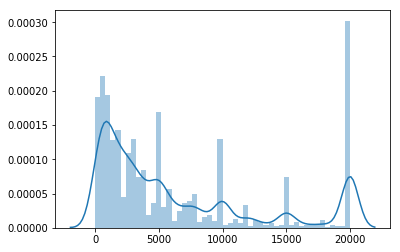

In [29]:
from scipy.stats.mstats import winsorize
GoalRealWin = winsorize(OnlySuccessful["usd_goal_real"], (0, 0.10))

sns.distplot(GoalRealWin)


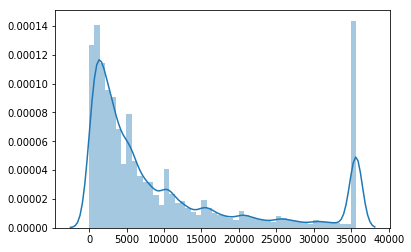

In [30]:
PledgedRealWin = winsorize(OnlySuccessful["usd_pledged_real"], (0, 0.10))

sns.distplot(PledgedRealWin)

The above winsorizations for botht the usd_goal_real and usd_pledged_real variables does help to bring it closer to something usable.  Further experimentation is required.

Below we experiment with BoxCox transformations to help normalize the data.  

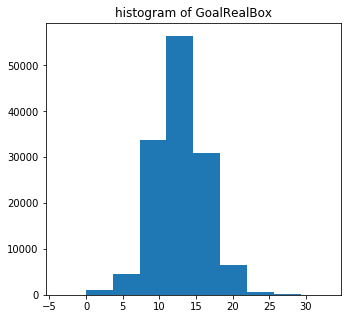

In [31]:
from scipy.stats import boxcox

GoalRealBox,_ = boxcox(OnlySuccessful["usd_goal_real"])


plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(GoalRealBox)
plt.title("histogram of GoalRealBox");



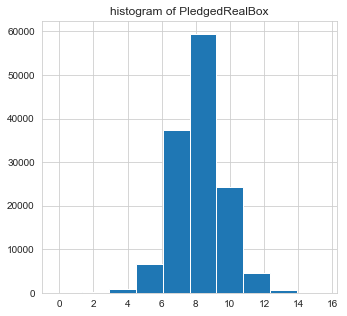

In [54]:
PledgedRealBox,_ = boxcox(OnlySuccessful["usd_pledged_real"])


plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(PledgedRealBox)
plt.title("histogram of PledgedRealBox");


Looks like using Box Cox gives up a better curve that is closer to what we need.

Below are experiments in normailizing the data using sklearn's preprocessing resources.

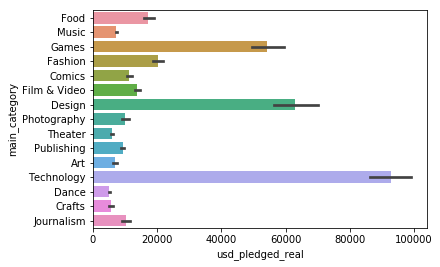

In [34]:
sns.barplot(x= OnlySuccessful['usd_pledged_real'], y= OnlySuccessful['main_category'])

Despite earlier signs looking at the percentages and counts of successful campaigns, this graph represents the 'actual' amounts of money flowing through each category.  Even though a category may have quantitatively fewer successful campaigns, the successful campaigns in technology have a higher amount of monies pledged.

Let's dive deeper into technology and see which subcategories are generating this money.

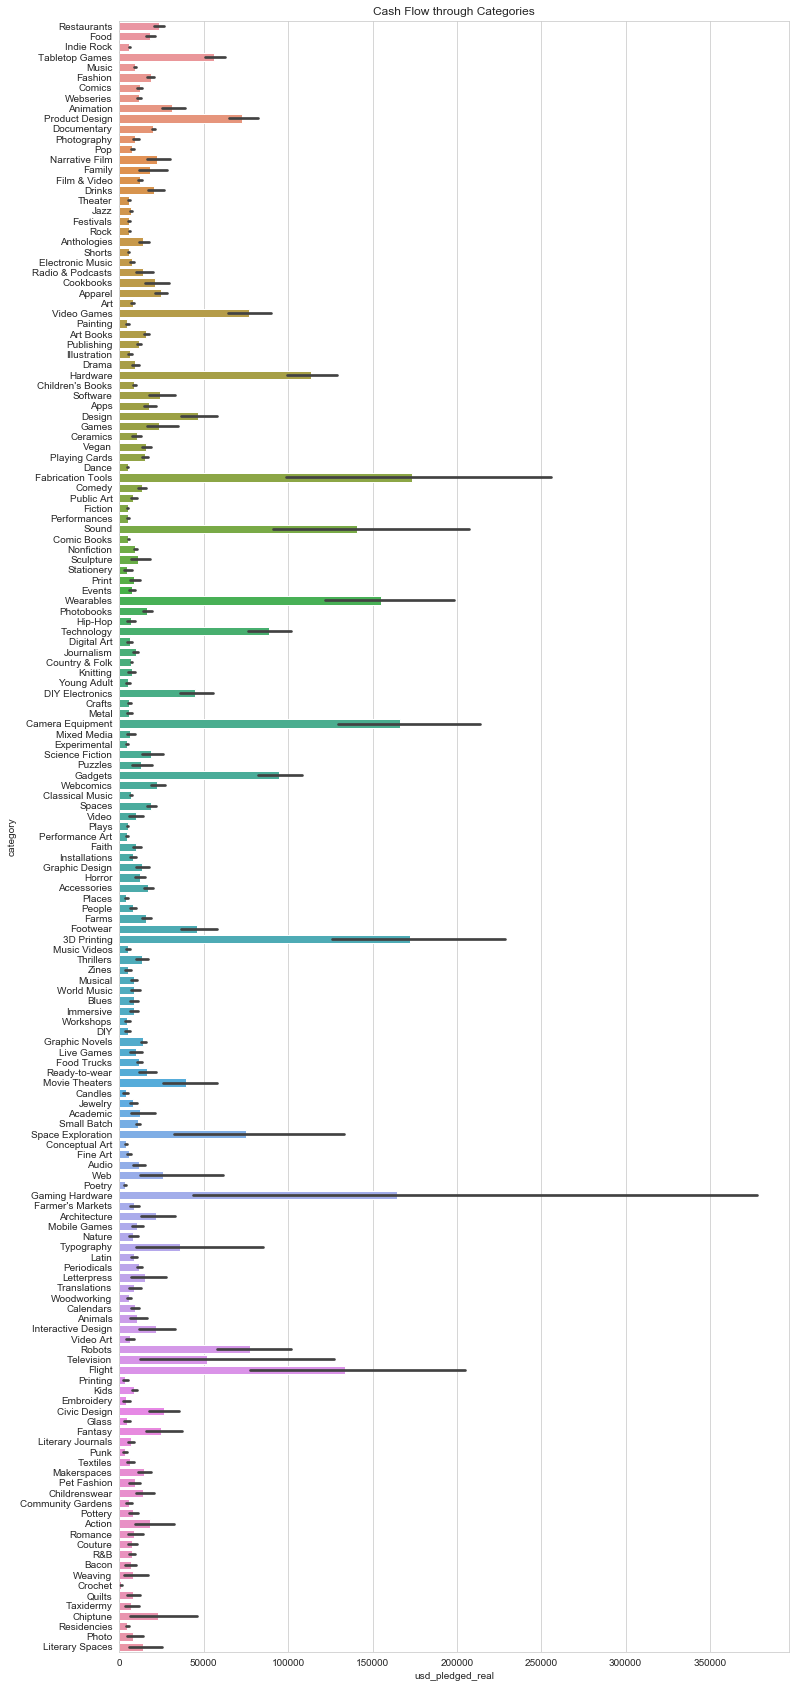

In [35]:
#lets see what specific subcategories the money is flowing through
plt.figure(figsize=(12,30))
sns.set_style("whitegrid")
g = sns.barplot(x="usd_pledged_real",y="category",
data=OnlySuccessful)
g = ("category","usd_pledged_real")
plt.title("Cash Flow through Categories")
plt.show(g);

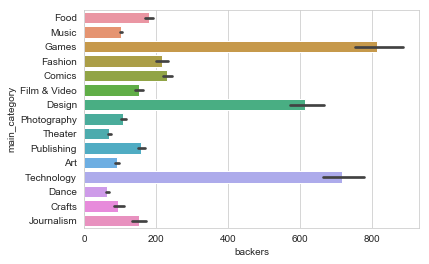

In [36]:
#this graph actually shows a lot of correlation between 'backers' and 'usd_pledged_real'. 
sns.barplot(x=OnlySuccessful['backers'], y=OnlySuccessful['main_category'])

In [37]:
OnlySuccessful.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'launched', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'canceled', 'failed', 'live',
       'successful', 'suspended'],
      dtype='object')

In [38]:
OnlySuccessful.corr()

,ID,backers,usd pledged,usd_pledged_real,usd_goal_real,canceled,failed,live,successful,suspended
ID,1.000000,0.001279,-0.000421,0.000492,0.004600,NaN,NaN,NaN,NaN,NaN
backers,0.001279,1.000000,0.694194,0.749990,0.487353,NaN,NaN,NaN,NaN,NaN
usd pledged,-0.000421,0.694194,1.000000,0.906769,0.494218,NaN,NaN,NaN,NaN,NaN
usd_pledged_real,0.000492,0.749990,0.906769,1.000000,0.482521,NaN,NaN,NaN,NaN,NaN
usd_goal_real,0.004600,0.487353,0.494218,0.482521,1.000000,NaN,NaN,NaN,NaN,NaN
canceled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suspended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


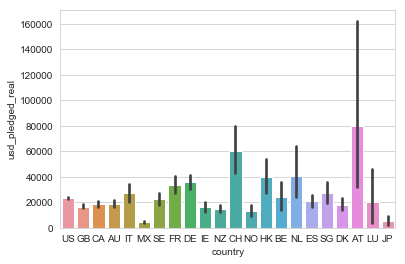

In [39]:
#Austria has a large confidence interval, but is the country from which most of the succesfful KickStarter 
#campaigns receive funding.
sns.barplot(x= OnlySuccessful['country'], y= OnlySuccessful['usd_pledged_real'])

In [40]:
OnlySuccessful.head(5)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,canceled,failed,live,successful,suspended
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,2/26/2016 13:38,successful,224,US,52375.00,52375.00,50000.00,0,0,0,1,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,12/21/2014,12/1/2014 18:30,successful,16,US,1205.00,1205.00,1000.00,0,0,0,1,0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,4/8/2013,3/9/2013 6:42,successful,100,US,12700.00,12700.00,12500.00,0,0,0,1,0
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5/3/2017,4/5/2017 19:44,successful,761,GB,57763.78,121857.33,6469.73,0,0,0,1,0
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,8/17/2012,8/2/2012 14:11,successful,7,US,250.00,250.00,250.00,0,0,0,1,0
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,12/30/2013,11/25/2013 7:06,successful,624,US,34268.00,34268.00,20000.00,0,0,0,1,0
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,11/12/2014,10/23/2014 17:15,successful,66,US,701.66,701.66,175.00,0,0,0,1,0
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,1/6/2011,12/7/2010 23:16,successful,147,US,15827.00,15827.00,10000.00,0,0,0,1,0
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,12/14/2014,11/14/2014 18:02,successful,571,CA,43203.25,42174.03,15313.04,0,0,0,1,0
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,1/28/2016,12/29/2015 16:59,successful,27,GB,167.70,160.60,142.91,0,0,0,1,0


At this point we can isolate individual countries and determine advertising campaigns that target each differently.

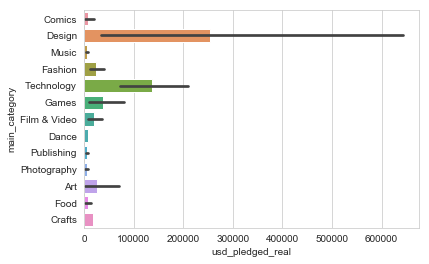

In [41]:
Austria = OnlySuccessful[(OnlySuccessful['country'] == 'AT')]

sns.barplot(y= Austria['main_category'], 
            x= Austria['usd_pledged_real'])

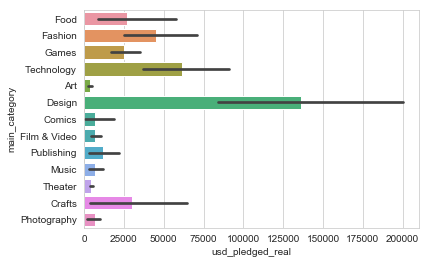

In [42]:
China = OnlySuccessful[(OnlySuccessful['country'] == 'CH')]

sns.barplot(y= China['main_category'], 
            x= China['usd_pledged_real'])

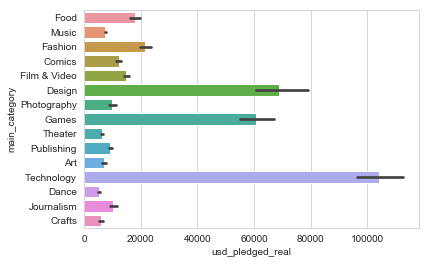

In [43]:
UnitedStates = OnlySuccessful[(OnlySuccessful['country'] == 'US')]

sns.barplot(y= UnitedStates['main_category'], 
            x= UnitedStates['usd_pledged_real'])

## Conclusion: 
From the initial analysis we can see that successful campaigns will vary by country and the number of backers increasing the revenue also plays a roll depending on the main/sub categories.  Utilizing this initial analysis, we can make recommendations for future studies based on A/B testing marketing strategies until we can be confident of a large scale marketing campaign to recommend.